In [5]:
import os
import shutil
import random

dataset_path = r"C:\Users\dejoe\git\ai_project\phase_3\input\chest_xray"
new_dataset_path = r"C:\Users\dejoe\git\ai_project\phase_3\input\chest_xray_new"

if not os.path.exists(new_dataset_path):
    for split in ['train', 'val', 'test']:
        for cls in ['NORMAL', 'PNEUMONIA']:
            os.makedirs(f'{new_dataset_path}\\{split}\\{cls}', exist_ok=True)

    for cls in ['NORMAL', 'PNEUMONIA']:
        all_files = []
        for split in ['train', 'val', 'test']:
            source_folder = f'{dataset_path}\\{split}\\{cls}'
            files = os.listdir(source_folder)
            all_files.extend([(file, source_folder) for file in files])

        random.shuffle(all_files)

        train_files = all_files[:int(len(all_files)*0.8)]
        val_files = all_files[int(len(all_files)*0.8):int(len(all_files)*0.9)]
        test_files = all_files[int(len(all_files)*0.9):]

        for file, source_folder in train_files:
            dest = f'{new_dataset_path}\\train\\{cls}\\{file}'
            shutil.copy(f'{source_folder}\\{file}', dest)

        for file, source_folder in val_files:
            dest = f'{new_dataset_path}\\val\\{cls}\\{file}'
            shutil.copy(f'{source_folder}\\{file}', dest)

        for file, source_folder in test_files:
            dest = f'{new_dataset_path}\\test\\{cls}\\{file}'
            shutil.copy(f'{source_folder}\\{file}', dest)


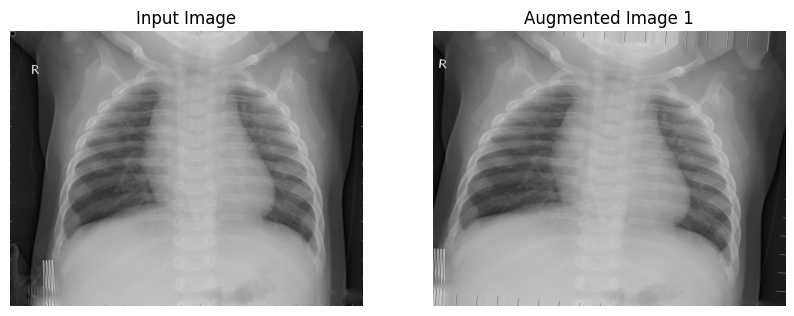

In [21]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = "C:\\Users\\dejoe\\git\\pneumonia-detection\\input\\chest_xray_new\\train\\NORMAL\\NORMAL-2558319-0002.jpeg"

# Define a function to display input and output images
def display_augmented_images(image_path, num_samples=5):
    # Load and preprocess the input image
    img = load_img(image_path)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Generate augmented images
    data_generator_1 = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest'
    )
    
    augmented_images = data_generator_1.flow(img_array, batch_size=1)

    # Display input image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, num_samples+1, 1)
    plt.imshow(img)
    plt.title('Input Image')
    plt.axis('off')
    
    # Display augmented images
    for i in range(num_samples):
        augmented_img = augmented_images.next()[0]
        plt.subplot(1, num_samples+1, i+2)
        plt.imshow(augmented_img)
        plt.title(f'Augmented Image {i+1}')
        plt.axis('off')
    
    plt.show()

# Example usage:
display_augmented_images(image_path, num_samples=1)
